# Project: Criminal Relations on Personal Gross Domestic Product #

CS 418 GitHub: [https://github.com/CS418/group-project-data-diver]

**Hypothesis**:  The correlation between crime and GDP is larger in Chicago than Los Angeles.

**Introduction**:
There are two datasets that we used anaylized to emphasize this hypothesis which is Chicago Crimes 2001 - Now ([https://catalog.data.gov/dataset crimes-2001-to-present](**https://catalog.data.gov/dataset/crimes-2001-to-present**)) that provides me an information about the crimes in Chicago from 2001 untill now. Moreover, we also use another dataset which is the Chicago GDP from 2001 - Now ([https://fred.stlouisfed.org/series/NGMP16980](**https://fred.stlouisfed.org/series/NGMP16980**)) to point out the corelation between the rate of crimes and GDP. The Last dataset should be the Crimes dataset in Los Angeles from 2010 to 2019 ([https://fred.stlouisfed.org/series/NGMP16980](**https://fred.stlouisfed.org/series/NGMP16980**))

**Any changes**? 

From the check-in proposal, we have added one more table which is the GDP table to have a brighter overview about the correlation between the GDP and the crimes rate, and we also make the comparison to the crime rate in Los Angeles. We have cleaned the data set which were around 2.21M rows for the crime dataset in LA crime dataset and the 

In [2]:
# Package usge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data description of Los Angeles:


In [3]:
crimes_LA_df = pd.read_csv('LA-2010-2019.csv')
crimes_LA_df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
print("Size of the dataframe:", crimes_LA_df.shape)

Size of the dataframe: (2119797, 28)


In [5]:

crimes_Chicago_df = pd.read_csv('Chicago-Crimes.csv')
crimes_Chicago_df.head(5)

<ipython-input-5-d77bc6508296>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_Chicago_df = pd.read_csv('Chicago-Crimes.csv')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [6]:
crimes_LA_df['Date Rptd'] = pd.to_datetime(crimes_LA_df['DATE OCC']).dt.year


In [7]:
crimes_LA_df.dtypes

DR_NO               int64
Date Rptd           int64
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [8]:
crimes_Chicago_df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                   object
Domestic                 object
Beat                    float64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                    float64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

**Information about the data:**
 
DR Number: a unique identification number assigned to each reported crime incident.

Date Reported: the date when the crime was reported to law enforcement.

Date Occurred: the date when the crime occurred.

Time Occurred: the time when the crime occurred.

Area ID: a numerical identifier for the geographic area where the crime occurred.

Area Name: the name of the geographic area where the crime occurred.
Reporting District: a numerical identifier for the reporting district where the crime occurred.

Crime Code: a numerical code that represents the type of crime that was reported.

Crime Code Description: a brief description of the type of crime that was reported.

MO Codes: a list of one or more numerical codes that represent the modus operandi, or method of operation, for the crime.

Victim Age: the age of the victim.

Victim Sex: the gender of the victim.

Victim Descent: the race/ethnicity of the victim.

Premise Code: a numerical code that represents the type of location where the crime occurred.

Premise Description: a brief description of the type of location where the crime occurred.

Weapon Used Code: a numerical code that represents the type of weapon that was used in the crime.

Weapon Description: a brief description of the type of weapon that was used in the crime.

Status Code: a numerical code that represents the status of the investigation into the crime.

Status Description: a brief description of the status of the investigation into the crime.

Crime Code 1: a numerical code that represents the primary type of crime that was reported.

Crime Code 2: a numerical code that represents a secondary type of crime that was reported.

Crime Code 3: a numerical code that represents a third type of crime that was reported.

Crime Code 4: a numerical code that represents a fourth type of crime that was reported.

Address: the street address where the crime occurred.
Cross Street: the cross street where the crime occurred.



In [9]:
crimes_LA_df.describe()

,DR_NO,Date Rptd,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.119797e+06,2.119797e+06,2.119797e+06,2.119797e+06,2.119797e+06,2.119797e+06,2.119797e+06,2.119797e+06,2.119744e+06,712365.000000,2.119787e+06,140534.000000,3541.000000,105.000000,2.119797e+06,2.119797e+06
mean,1.480538e+08,2.014629e+03,1.359294e+03,1.108751e+01,1.155139e+03,1.446631e+00,5.073721e+02,3.175379e+01,3.116512e+02,371.452750,5.071943e+02,949.148420,972.190907,975.323810,3.406368e+01,-1.183084e+02
std,2.898578e+07,2.884316e+00,6.471747e+02,6.012365e+00,6.012509e+02,4.971437e-01,2.107219e+02,2.064759e+01,2.114669e+02,113.350414,2.105824e+02,125.646471,85.391450,80.915494,7.142398e-01,2.450040e+00
min,1.208575e+06,2.010000e+03,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-1.100000e+01,1.010000e+02,101.000000,1.100000e+02,122.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214271e+08,2.012000e+03,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401050e+01,-1.184365e+02
50%,1.508126e+08,2.015000e+03,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.715175e+08,2.017000e+03,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.019000e+03,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


In [10]:
#Describing based on catergories
crimes_LA_df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Vict Sex,1923031,6,M,976010
Status Desc,2119797,6,Invest Cont,1624011
Status,2119794,9,IC,1624011
Vict Descent,1922985,20,H,727540
AREA NAME,2119797,21,77th Street,145604
Weapon Desc,712364,79,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",432427
Crm Cd Desc,2119797,142,BATTERY - SIMPLE ASSAULT,190569
Premis Desc,2119610,320,STREET,472976
DATE OCC,2119797,3652,01/01/2010 12:00:00 AM,2311
Cross Street,355595,12878,BROADWAY,6159


In [11]:
# Annual Crimes in LA:
crimes_LA_df.groupby('Date Rptd')['Date Rptd'].count()


Date Rptd
2010    209229
2011    200792
2012    201621
2013    192689
2014    195628
2015    215641
2016    225609
2017    231303
2018    229197
2019    218088
Name: Date Rptd, dtype: int64

In [12]:
# Annual Crimes in Chicago:
crimes_Chicago_df.groupby('Year')['Year'].count()

Year
2001.0    467206
2002.0    459440
2003.0    461316
2004.0    457576
2005.0    441713
2006.0    437090
2007.0    428725
2008.0    415007
2009.0    381717
2010.0    362606
2011.0    134865
2012.0       463
2013.0       720
2014.0      1728
2015.0    193717
2016.0    261994
2017.0    261539
2018.0    261253
2019.0    146924
2020.0     22353
2021.0      3054
2022.0        71
Name: Year, dtype: int64

In [55]:
# Display the GDP dataframe: 
# Read Excel file
# Create a dictionary with the data
gdp_df = {'Year': [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, '2021*'],
        'GDP': [632.42, 645.85, 673.63, 696.49, 717.80, 746.82, 754.28, 762.21, 729.62, 750.12, 759.14, 770.62, 784.82, 803.96, 835.96, 851.20, 880.17, 908.73, 930.86, 882.79, 950.16]}

# Create a DataFrame from the dictionary
gdp_df = pd.DataFrame(gdp_df)

# Display the first 5 rows of the DataFrame
print(gdp_df)

     Year     GDP
0    2001  632.42
1    2002  645.85
2    2003  673.63
3    2004  696.49
4    2005  717.80
5    2006  746.82
6    2007  754.28
7    2008  762.21
8    2009  729.62
9    2010  750.12
10   2011  759.14
11   2012  770.62
12   2013  784.82
13   2014  803.96
14   2015  835.96
15   2016  851.20
16   2017  880.17
17   2018  908.73
18   2019  930.86
19   2020  882.79
20  2021*  950.16


In [14]:
Chicago_df = pd.read_csv('Chicago-GDP.csv')
Chicago_df['DATE'] = pd.to_datetime(Chicago_df['DATE']).dt.year

Chicago_df

,DATE,NGMP16980
0,2001,401407.693
1,2002,411155.211
2,2003,425385.586
3,2004,449004.156
4,2005,472993.552
5,2006,500969.502
6,2007,523165.163
7,2008,520597.015
8,2009,510758.958
9,2010,523098.041


# Problem: 

According to recently revealed official FBI statistics, the entire violent crime rate—which includes homicide, assault, robbery, and rape—inched up by about 5%, although property offenses kept on falling and fell by 8% from the previous year (Treisman 1). The Economic Theory, which assumes a positive association between unemployment and property crime in particular, is the most well-known criminological theory. It states that rising unemployment rates will be associated with rising property crime rates (Becker, 1968; Freeman, 1996). 





# Research question: 

What is the correlation of lower GDP to rate of theft burgalry, and robbery? 

# Data Cleaning:

In [15]:
print("The Original data of LA before cleaning: ", crimes_LA_df.size) 

The Original data of LA before cleaning:  59354316


In [16]:
print("The Original data of Chciago before cleaning: ", crimes_Chicago_df.size) 

The Original data of Chciago before cleaning:  123223716


In [17]:
# Eliminate the duplicate in LA dataframe:
crimes_LA_df = crimes_LA_df.drop_duplicates()

In [18]:
# Eliminate the duplicate in LA dataframe:
crimes_Chicago_df = crimes_Chicago_df.drop_duplicates()

In [19]:
# Remove the redundant columns in LA dataset, we could see that DR Number and MO
# should be two redundant columns.
crimes_LA_df.drop(["DR_NO", "Mocodes"], axis=1, inplace=True)


In [20]:
# We just take the data before 2022 to match with the GDP: 
crimes_Chicago_df = crimes_Chicago_df[(crimes_Chicago_df["Year"] <= 2019.0) & (crimes_Chicago_df["Year"] >= 2010.0)]


In [48]:
# Convert the year from float to integer in Chicago dataset: 
crimes_Chicago_df['Year'] = crimes_Chicago_df['Year'].astype(int)


In [22]:
# Check if there are missing values in LA dataset
crimes_LA_df.isna().sum()


Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Vict Age                0
Vict Sex           196766
Vict Descent       196812
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1407432
Weapon Desc       1407433
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1979263
Crm Cd 3          2116256
Crm Cd 4          2119692
LOCATION                0
Cross Street      1764202
LAT                     0
LON                     0
dtype: int64

In [23]:
# Drop missing values in LA dataset:
crimes_LA_df.dropna(inplace=True)
print(crimes_LA_df.isna().sum())


Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64


In [24]:
# Check if there are missing values in Chicago data:  
crimes_Chicago_df.isna().sum()


ID                         0
Case Number                1
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    4031
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                      31
Community Area           241
FBI Code                   0
X Coordinate            9668
Y Coordinate            9668
Year                       0
Updated On                 0
Latitude                9668
Longitude               9668
Location                9668
dtype: int64

In [25]:
# Drop missing values in Chicago dataset:
crimes_Chicago_df.dropna(inplace=True)
print(crimes_Chicago_df.isna().sum())

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [26]:
print("The data size of LA after cleaning: ", crimes_LA_df.size) 

The data size of LA after cleaning:  572


In [27]:
print("The data size of Chicago after cleaning: ", crimes_Chicago_df.size) 

The data size of Chicago after cleaning:  35485670


# Discuss about the data size: 

After cleaning by dropping missing values and redundant patterns of the dataset, the data size of LA drops from 59354316 -> 572 and the data size of Chicago is dropped from 123223716 -> 35485670

# Exploratory data analysis:

From here we will make some data visualization to have a wider view about the data set.

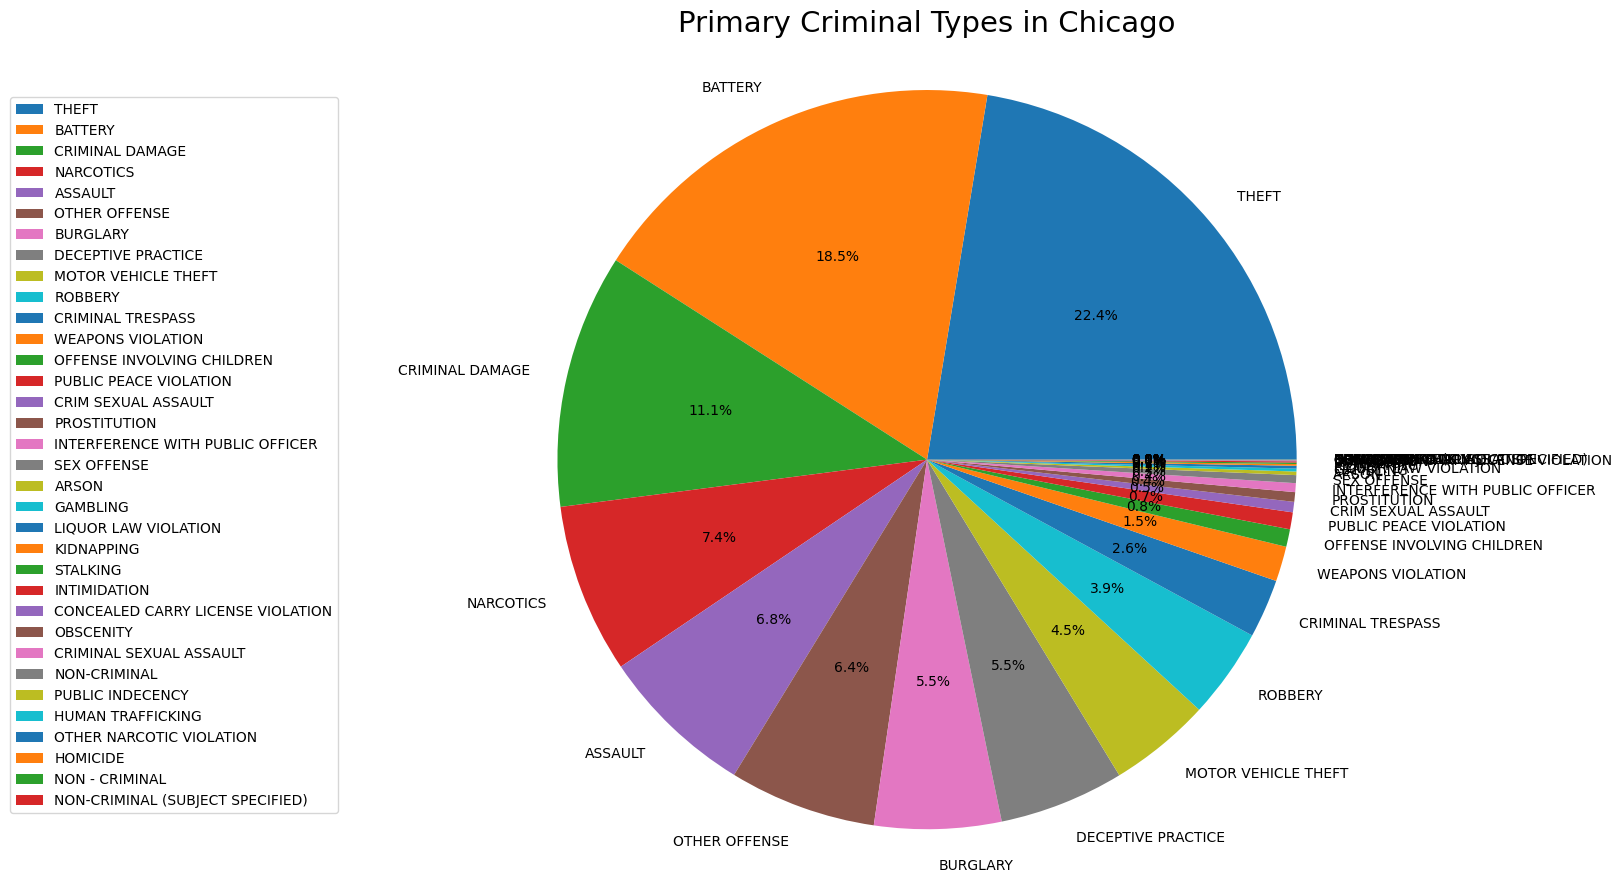

In [35]:
plt.title('Primary Criminal Types in Chicago',fontsize=21,pad=175)
crimes_data_primary_type_pie = plt.pie(crimes_Chicago_df['Primary Type'].value_counts().values,labels=crimes_Chicago_df['Primary Type'].value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(bbox_to_anchor=(-2.0, 1.5), loc="upper left")

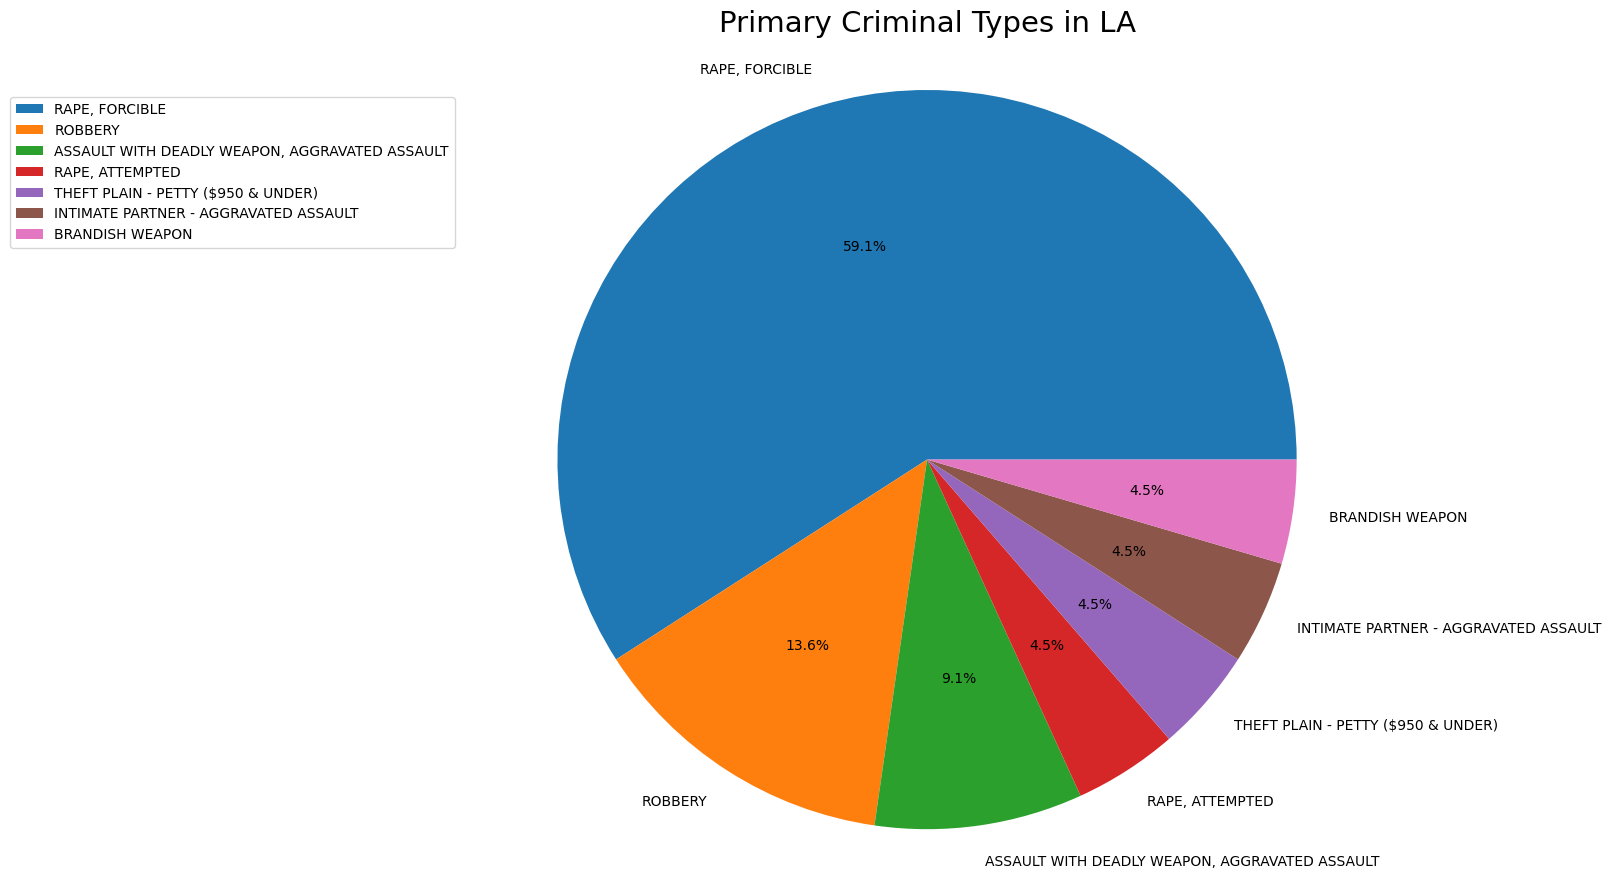

In [37]:
plt.title('Primary Criminal Types in LA',fontsize=21,pad=175)
crimes_data_primary_type_pie = plt.pie(crimes_LA_df['Crm Cd Desc'].value_counts().values,labels=crimes_LA_df['Crm Cd Desc'].value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(bbox_to_anchor=(-2.0, 1.5), loc="upper left")

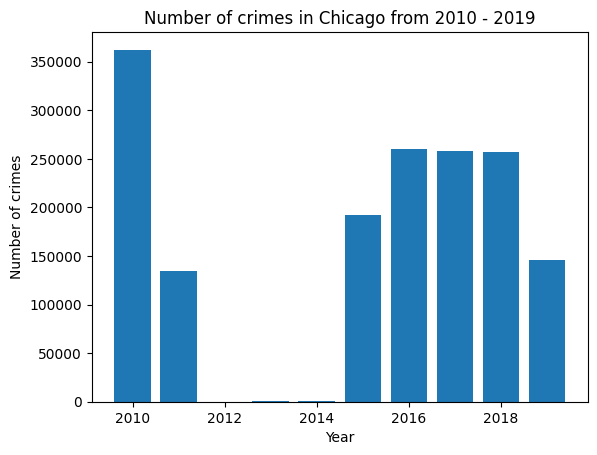

In [42]:
grouped = crimes_Chicago_df.groupby('Year')['Year'].count()

# Create a bar plot
plt.bar(grouped.index, grouped.values)

# Set the title and axis labels
plt.title('Number of crimes in Chicago from 2010 - 2019')
plt.xlabel('Year')
plt.ylabel('Number of crimes')

# Show the plot
plt.show()

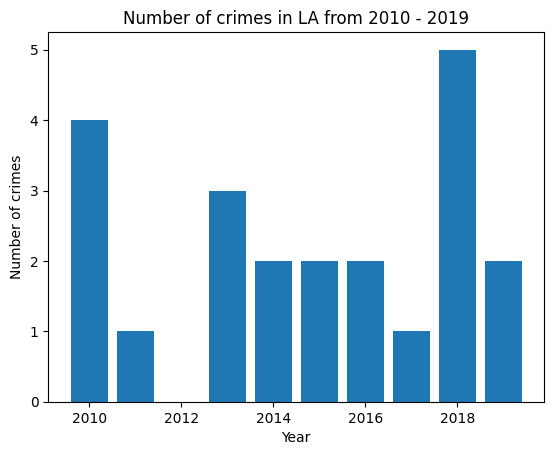

In [44]:
grouped_LA = crimes_LA_df.groupby('Date Rptd')['Date Rptd'].count()

# Create a bar plot
plt.bar(grouped_LA.index, grouped_LA.values)

# Set the title and axis labels
plt.title('Number of crimes in LA from 2010 - 2019')
plt.xlabel('Year')
plt.ylabel('Number of crimes x 1000')

# Show the plot
plt.show()

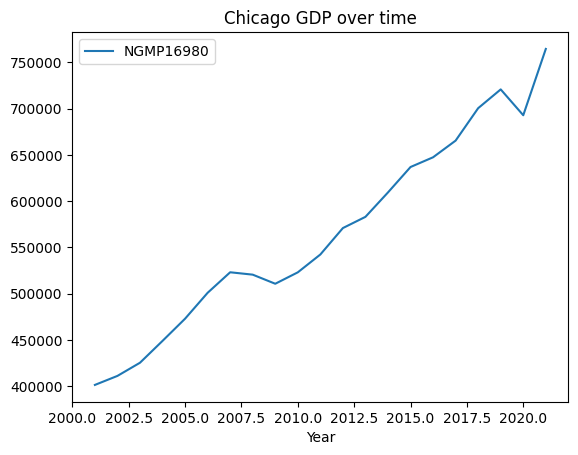

In [47]:
# Set the year column as the index of the DataFrame
Chicago_df.set_index('DATE', inplace=True)

# Create a line plot of the data
Chicago_df.plot(kind='line', title='Chicago GDP over time')

# Set the x-axis label
plt.xlabel('Year')

# Show the plot
plt.show()

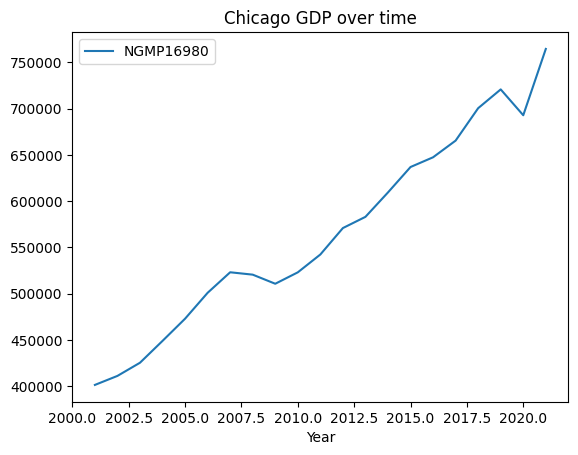

In [50]:
# Create a line plot of the data
Chicago_df.plot(kind='line', title='Chicago GDP over time')

# Set the x-axis label
plt.xlabel('Year')

# Show the plot
plt.show()

<ipython-input-56-924232bfef98>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdp_df['Year'] = gdp_df['Year'].astype(str).str.replace('*', '')


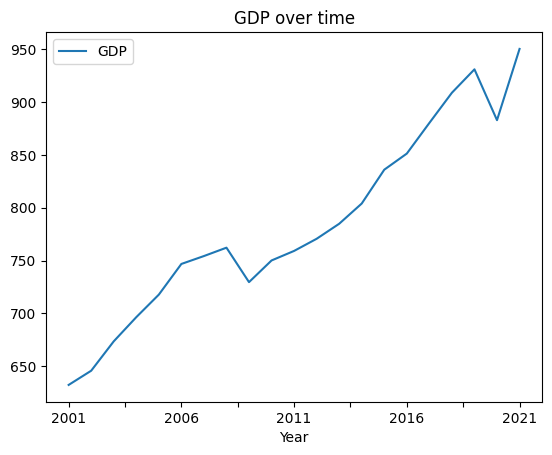

In [56]:
# Convert the year column to a string and remove the asterisk from the last year
gdp_df['Year'] = gdp_df['Year'].astype(str).str.replace('*', '')

# Set the year column as the index of the DataFrame
gdp_df.set_index('Year', inplace=True)

# Create a line plot of the data
gdp_df.plot(kind='line', title='GDP over time')

# Set the x-axis label
plt.xlabel('Year')

# Show the plot
plt.show()

Discussion about the visualization: We could see that there is a crimination correlation between Chicago and LA. 

# Model PLanning: 

1. KNN: K-Nearest Neighbors: 
  I would use this model to predict the criminal rate of Chicago and LA responding to GDP from 2010-2019. These are some benefits and disadvantages for using this model: 
  
  **Benefits:**
      
      + KNN can work well when the relationship between the criminal stats and GDP, variables is nonlinear or there are complex interactions between the features.

      + KNN is a non-parametric algorithm, which means it does not make any assumptions about the distribution of the data, making it robust to outliers and skewed data.
      
      + KNN is easy to understand and implement, making it a good choice for simple problems and as a baseline for comparison against other more complex algorithms.
  
  **Drawbacks:**

      + KNN can be computationally expensive, especially for large datasets, because it requires calculating the distance between each observation in the training set and the new observation to be predicted.
      
      + KNN may not work well in high-dimensional spaces, where the distance between the nearest neighbors may become less informative as the number of dimensions increases.

      + The choice of k and the distance metric can have a significant impact on the performance of the algorithm, and these hyperparameters must be carefully tuned to achieve good results.

      + KNN can suffer from the curse of dimensionality, where the amount of data required to maintain a constant level of accuracy grows exponentially as the number of dimensions increases.
      
      + KNN is sensitive to the scale of the input features, and it is often necessary to normalize or standardize the data before using KNN to ensure that all features are on the same scale.

2. Logistic Regression: I also add the logistic regression model to predict the criminial rate of Chicago and LA. The target feature would be "arrest" to improve the accuracy of the model. For example, if an arrest was made in connection with a crime, it is more likely that the crime actually occurred, and this information can be used to adjust the probabilities of the different outcomes in the logistic regression model.

 **Benefits:**

  + Logistic regression is a simple and interpretable algorithm, making it easy to understand and explain the results of the model.

  + Logistic regression can work well when there are clear patterns in the data and the relationship between the input variables (GDP) and the target variable (criminal data) is linear or can be transformed to a linear relationship.
Logistic regression can handle both numerical and categorical input variables.
Logistic regression can provide probabilities of the target variable, allowing for a more nuanced understanding of the predictions.

 **Drawbacks:**

  + Logistic regression assumes a linear relationship between the input variables and the log-odds of the target variable, which may not be accurate for all cases.
  
  + Logistic regression assumes that the input variables are independent, which may not be true in practice, leading to biased or inaccurate predictions.
  
  + Logistic regression may not perform well when there are a large number of input variables or when there are interactions between the input variables, as this can lead to overfitting or poor generalization.
  + Logistic regression is sensitive to outliers and may not perform well if there are outliers in the data.

  + Logistic regression may not be appropriate if the data is imbalanced, meaning that there are many more observations of one class than the other, as this can lead to biased predictions.

3. Gradient Boosting Algorithm: we train a regression model using the crime rate as the target variable and GDP as the input feature. You can then use the model to make predictions about the crime rate based on changes in GDP. GBM can help to identify the nonlinear and complex relationships between the input and output variables, and can handle a large number of input features.

  **Benefits:**

  + GBM can handle large and complex datasets with many input features, making it suitable for this problem.

  + GBM can handle both numerical and categorical input features.
  + GBM can capture nonlinear and complex relationships between the input and output variables, making it useful for finding correlations between crime rate and GDP.
  + GBM can provide feature importance scores that can help to identify the most important input features for predicting crime rate.
  
 **Drawbacks:**

  + GBM can be computationally expensive and may require significant computational resources to train and tune the model.
  + GBM is sensitive to overfitting and may not generalize well to new data if the model is overfit to the training data.
  + GBM can be difficult to tune due to the large number of hyperparameters that must be optimized, such as the number of trees, the learning rate, and the depth of the trees.
  + GBM can be sensitive to outliers and missing data, which may need to be handled before training the model.



# Reflection: 

1. What is the hardest part of the project that you’ve encountered so far?

  1.1. The most challenging is cleaning data and find a more efficienct data or checking the error existed with affect to the accuracy. Note that since the data is large, it is hard to generate unit_test case for a 100% accurate. Processing a lot of data can be memory-intensive, which can cause performance problems or even system crashes if there isn't enough memory accessible. As having mentioned before that I had to split to multiple table manually and the process required weeks to complete.

  1.2. Another challenging is that the criminal data report is not consistency, in which the criminal record in year 2004, 2005 is significantly different from 2001. For example, there were 7 record for 2004 while more than 10,000 records in 2001; which means some information had been implicitly hidden or the data does not support full record in a year, which reduce the accuracy the conclusion

2. What are your initial insights?

  For the first problem on data complexity, I completed the manual splitting to be able to upload files to virtual environment. However, when studying Data Mining in 483, I have known that PySpark or Hadoop virtual environment could support for large data with high performance of $O(log N)$, I may try to search on that approach

  For the second problem, I need to find data for each year with number record is approximately or not significantly different. In case no databases support, I may come up with grouping by year-period instead of specifying each year


3. Are there any concrete results you can show at this point? If not, why not?

  Yes. I have shown the significant different among data record. The reason I am postponing the model training is that I need more time to find consistent data; otherwise, I may come up with Professor for advise or change location (instead of concentrate on Chicago, I could change to New York or Wisconsin...) which contain for database record in an appropriate consistency


4. Going forward, what are the current biggest problems you’re facing?

  Finding and verifying if data is appropriate before training models.
  That is the biggest task I need to figured out ASAP

5. Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

  Yes, I am on track with the project as models formula has been found and it is not hard to apply the models if the data has been clean and extracted to the dataFrame. There is *one* challenge is finding and verifying if data is appropriate before training models.
  That is the biggest task I need to figured out ASAP


6. Given your initial exploration of the data, is it worth proceeding with your project, and why? 

  Currently, the data could not be trained with models due to the accuracy (please view the figure at the end of the report for more detail due to the inconsistent record from the source)


7. If not, how are you going to change your project and why do you think it’s better than your current results?

  Currently, I am not thinking about changing the project. If yes, the only thing need to be changed is the data files instead of the project idea.The investigation of the intricate and diverse correlation between GDP and crime is crucial to comprehending the impact of economic factors on crime. Through such research, we can gain insights into how fluctuations in economic conditions influence crime rates and how various economic variables contribute to the occurrence of distinct categories of criminal activities. Furthermore, it is imperative to recognize that the connection between GDP and crime is intimately linked to social inequality. Studies have demonstrated that individuals hailing from underprivileged socioeconomic backgrounds are more susceptible to engaging in criminal conduct. Therefore, delving into this relationship can assist in identifying regions where social inequality is particularly prominent and in devising targeted interventions aimed at curbing criminal activities while promoting social mobility.

# Next steps: 

After having the data cleanned, we will spend more effort on training the model based on the the processed data. The goal for next milestone should be try to train the model to achieve the accuracy of 65%-70%. As soon as we can not have that goal achieved, we will get back to the data and try to re-format the data to be the best fit to the chosen models. The worst case is that the models do not work well, we will have to change to the new model to fit the data. The goal for this project is to achieve as much as accuracy for the model, but 65%-70% should be the minimum, otherwise, the model does not fit the dataset.

# References: 

1. World Bank. (n.d.). GDP (current US$) - United States. Retrieved February 27, 2023, from
 https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=US

2. City of Chicago. (n.d.). Crimes - 2001 to Present. Data.gov. Retrieved February 27, 2023, from 
https://catalog.data.gov/dataset/crimes-2001-to-present

3. U.S. Department of Justice. (2021). Crime Data from 2020 to Present. Data.gov. Retrieved February 27, 2023, from 
https://catalog.data.gov/dataset/crime-data-from-2020-to-present

4. Beck, A. (2020, July). Exploring the Link Between Economics and Crime: A Complex Picture [White paper]. CAP Index. 
https://capindex.com/wp-content/uploads/2020/07/Exploring-the-Link-Between-Economics-and-Crime-A-Complex-Picture-A-paper-by-Professor-Adrian-Beck-with-CAP-Index-July-2020_f.pdf

5. NPR. (2022, October 27). U.S. Crime Data Could Shape Midterm Elections. NPR. 
https://www.npr.org/2022/10/27/1131825858/us-crime-data-midterm-elections


6. NPR. (2021, September 27). FBI Data Show Surge In Murders In 2020. NPR. 
  
  https://www.npr.org/2021/09/27/1040904770/fbi-data-murder-increase-2020


7. World Bank. (n.d.). GDP (current US$). Retrieved February 27, 2023, from 

  https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

8. Kristiansen, Søren L. “Nearest Neighbors with Keras and Coreml.” Medium, Medium, 20 May 2019, https://medium.com/@sorenlind/nearest-neighbors-with-keras-and-coreml-755e76fedf36. 

9. Goyal, Anant. “Logistic Regression with Keras.” MarkTechPost, 9 Apr. 2021, https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/. 

10. Masui, Tomonori. “All You Need to Know about Gradient Boosting Algorithm − Part 1. Regression.” Medium, Towards Data Science, 12 Feb. 2022, https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502. 


